# 1. Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve , roc_auc_score

### Load the dataset

In [3]:
df = pd.read_csv(r"placement.csv")
df.shape

(200, 2)

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [8]:
# Basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None
             cgpa     package
count  200.000000  200.000000
mean     6.990500    2.996050
std      1.069409    0.691644
min      4.260000    1.370000
25%      6.190000    2.487500
50%      6.965000    2.995000
75%      7.737500    3.492500
max      9.580000    4.620000


# 2. Data Preprocessing


In [11]:
# Check for missing values
print(df.isnull().sum())

cgpa       0
package    0
dtype: int64


In [13]:
# No missing values

# 3. Histplot for checking data distribution

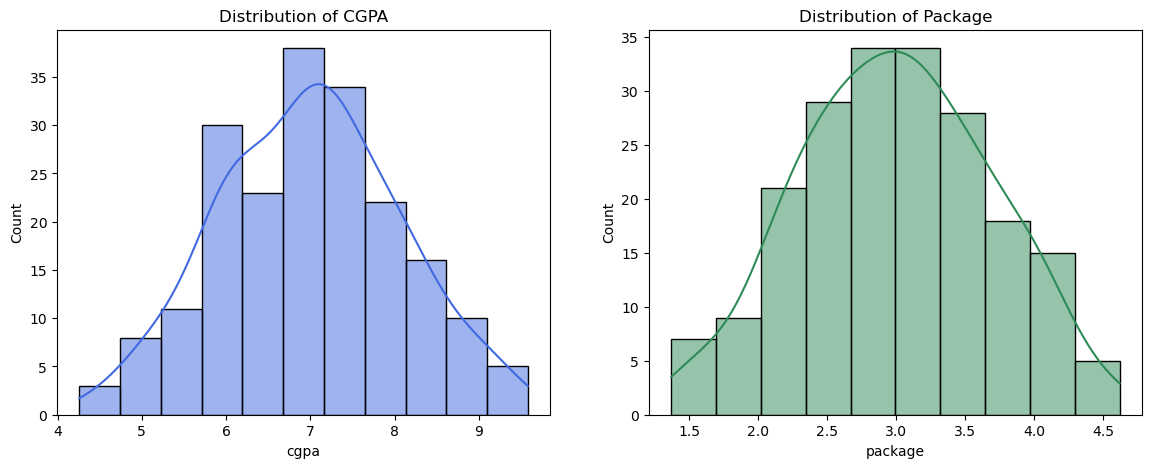

In [16]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

sns.histplot(df['cgpa'], kde=True, color='royalblue')
plt.title('Distribution of CGPA')

plt.subplot(1, 2, 2)
sns.histplot(df['package'], kde=True, color='seagreen')
plt.title('Distribution of Package')

plt.show()


In [18]:
# Both are near to normal distribution

# 4. Scatterplot

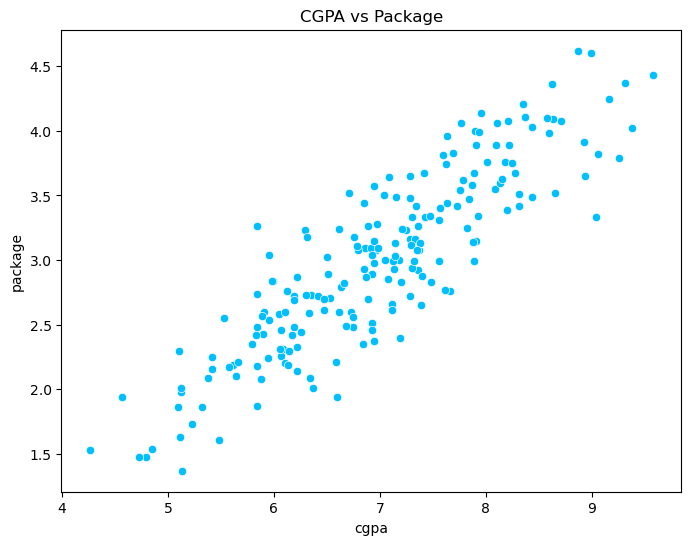

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cgpa', y='package', data=df, color='deepskyblue')
plt.title('CGPA vs Package')
plt.show()

In [23]:
# Correlation
corr = df['cgpa'].corr(df['package'])
print(f"Correlation between CGPA and Package: {corr:.2f}")

Correlation between CGPA and Package: 0.88


In [25]:
# Strong positive correlation between CGPA and Package

# 5. Linear Regression

In [28]:
X = df[['cgpa']].values
y = df['package'].values

In [30]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Fit the linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X, y)

LinearRegression()

In [34]:
y_pred = LR.predict(X)

In [51]:
y_class = (y >= 0.5).astype(int)
y_pred_class = (y_pred >= 0.5).astype(int)


#### Linear Regression accuracy score

In [54]:
accuracy = accuracy_score(y_class,y_pred_class)
print(f"Accuracy score: {accuracy:.2f}")


Accuracy score: 1.00


In [56]:
# 100% accuracy over test data

In [58]:
# Regression statistics
intercept = LR.intercept_
slope = LR.coef_[0]
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)


In [60]:
# Print regression report
print("Linear Regression Report:")
print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Linear Regression Report:
Intercept: -0.9857
Slope: 0.5696
R-squared: 0.7756
Mean Squared Error: 0.1068
Mean Absolute Error: 0.2596


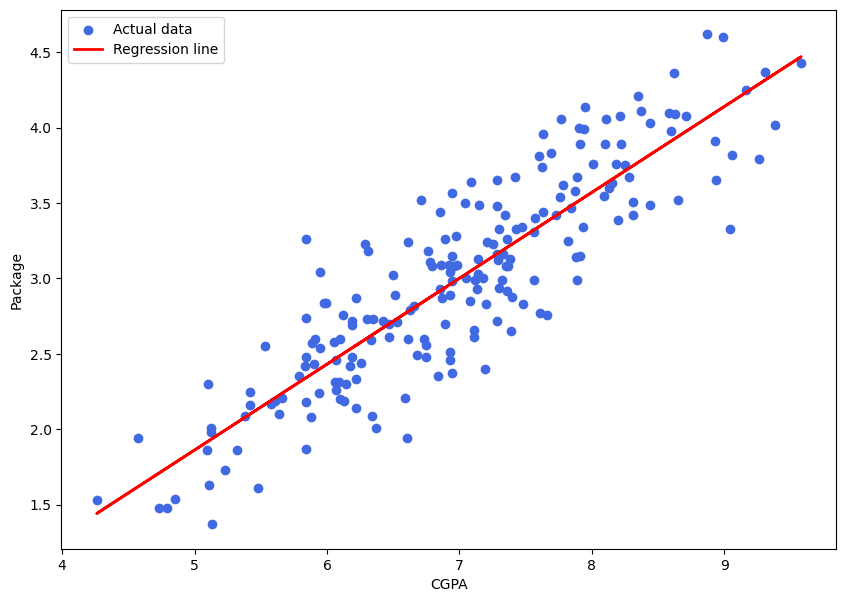

In [62]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, color='royalblue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()

# 6. Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
LoR = LogisticRegression()

In [67]:
median_package = df['package'].median()
df['high_package'] = (df['package'] > median_package).astype(int)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['high_package'], test_size=0.2, random_state=42
)

In [71]:
y_train = y_train.astype(int)


In [73]:
LoR.fit(X_train, y_train)


LogisticRegression()

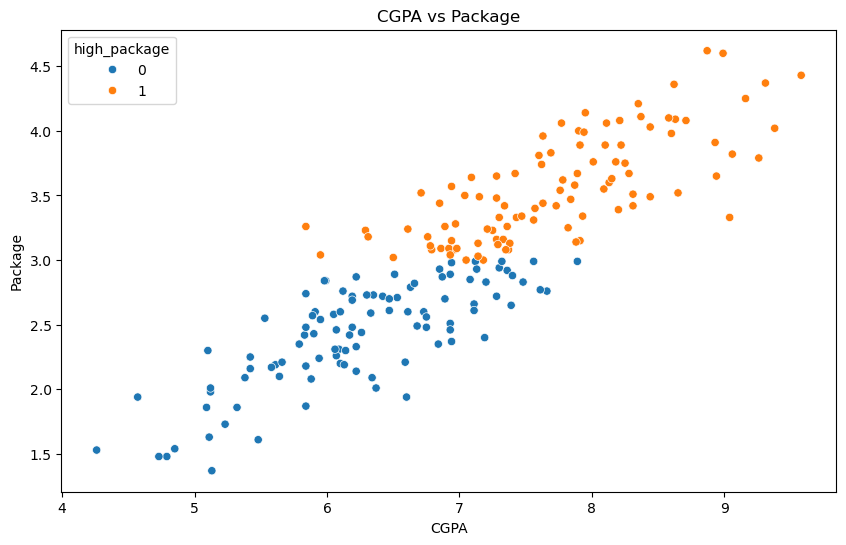

In [75]:
# Visualize the classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='package', hue='high_package', data=df)
plt.title('CGPA vs Package')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.savefig('classification_scatter.png')
plt.show()


In [77]:
# Get predicted probabilities for the positive class
y_pred_prob = LoR.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)


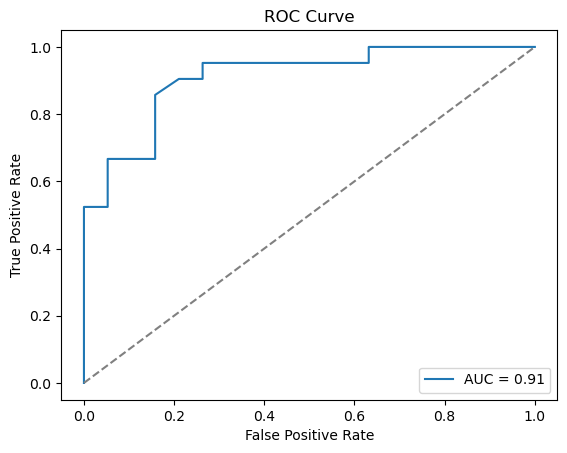

In [79]:
# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

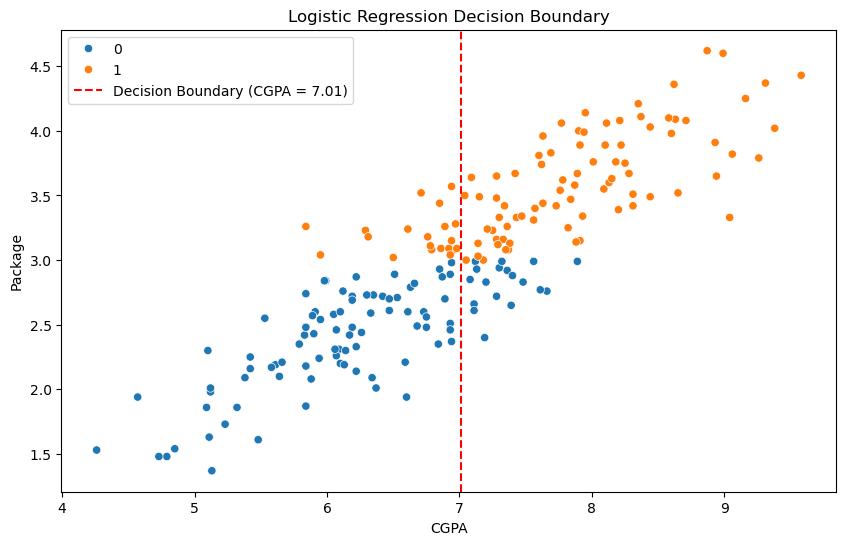

In [81]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='package', hue='high_package', data=df)

# Calculate decision boundary
intercept = LoR.intercept_[0]
coef = LoR.coef_[0][0]
decision_boundary = -intercept / coef

plt.axvline(x=decision_boundary, color='red', linestyle='--',
            label=f'Decision Boundary (CGPA = {decision_boundary:.2f})')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()


#### The decision boundary in logistic regression is the CGPA value where the model predicts a 50% chance of getting a high package. Students above 7.01 CGPA are classified as likely to get a high package, while those below are classified as unlikely. It’s the cutoff that separates the two classes based on predicted probability

In [84]:
# Prediction function for new CGPA values
def predict_placement_probability(cgpa):
    log_odds = LoR.intercept_[0] + LoR.coef_[0][0] * cgpa
    probability = 1 / (1 + np.exp(-log_odds))
    return probability

# Example predictions
test_cgpas = [5.0, 6.0, 7.0, 8.0, 9.0]
for cgpa in test_cgpas:
    prob = predict_placement_probability(cgpa)
    print(f"CGPA {cgpa:.1f}: Probability of high package = {prob:.4f}")


CGPA 5.0: Probability of high package = 0.0102
CGPA 6.0: Probability of high package = 0.0913
CGPA 7.0: Probability of high package = 0.4941
CGPA 8.0: Probability of high package = 0.9047
CGPA 9.0: Probability of high package = 0.9893


# 7. SVM Classifier

In [87]:
from sklearn.svm import SVC

# Train SVM classifier (linear kernel for 1D feature)
X = df[['cgpa']].values
y = df['high_package'].values
SVM = SVC(kernel='linear')
SVM.fit(X, y)


SVC(kernel='linear')

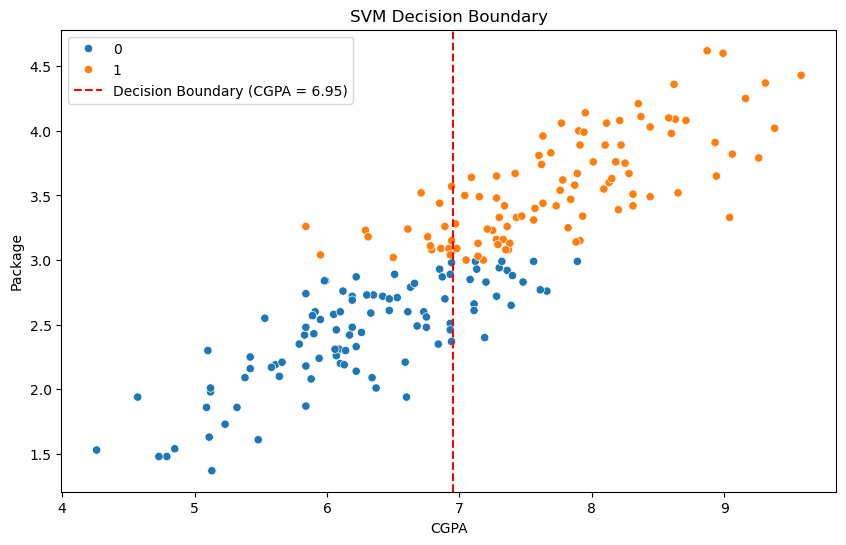

In [89]:
# Plot data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='package', hue='high_package', data=df)

# Calculate decision boundary for SVM (for 1D feature)
w = SVM.coef_[0][0]
b = SVM.intercept_[0]
decision_boundary = -b / w

plt.axvline(x=decision_boundary, color='red', linestyle='--',
            label=f'Decision Boundary (CGPA = {decision_boundary:.2f})')

plt.title('SVM Decision Boundary')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()

In [91]:
# For SVM(linear) decision boundary is CGPA=6.95

# 8. Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train Decision Tree
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [96]:
# prediction
y_pred = DT.predict(X)

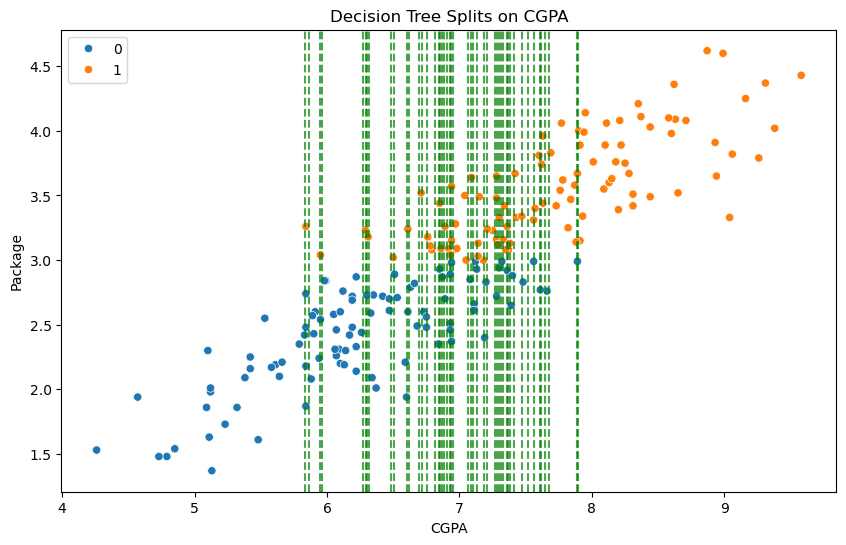

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='package', hue='high_package', data=df)

# Get unique split points from the tree
thresholds = [DT.tree_.threshold[i] for i in range(DT.tree_.node_count) if DT.tree_.children_left[i] != DT.tree_.children_right[i]]
for thresh in thresholds:
    if thresh != -2:  # -2 is a placeholder for leaves
        plt.axvline(x=thresh, color='green', linestyle='--', alpha=0.7)

plt.title('Decision Tree Splits on CGPA')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()
